In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

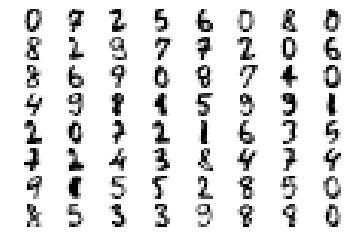

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50042 stdev: 0.17703
Best fitness: 0.97231 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.483
Mean genetic distance 2.907, standard deviation 0.485
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 1.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56549 stdev: 0.20060
Best fitness: 0.99077 - size: (3, 15) - species 19 - id 358
Average adjusted fitness: 0.514
Mean genetic distance 2.952, standard deviation 0.471
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 1.855 sec (1.608 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63066 stdev: 0.18087
Best fitness: 0.99077 - size: (3, 14) - species 18 - id 528
Average adjusted fitness: 0.496
Mean genetic distance 2.978, standard deviation 0.465
Population of 198 members in 29 species
Total extinct

Population's average fitness: 0.81185 stdev: 0.19500
Best fitness: 0.99692 - size: (6, 17) - species 32 - id 2379
Average adjusted fitness: 0.457
Mean genetic distance 3.156, standard deviation 0.510
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 2.683 sec (2.551 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.79570 stdev: 0.20430
Best fitness: 0.99692 - size: (6, 17) - species 32 - id 2379
Average adjusted fitness: 0.570
Mean genetic distance 3.144, standard deviation 0.513
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 2.722 sec (2.542 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.81514 stdev: 0.20163
Best fitness: 0.99692 - size: (6, 17) - species 32 - id 2379
Average adjusted fitness: 0.651
Mean genetic distance 3.137, standard deviation 0.519
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 2.475 sec (2.498 average)

 ******

Population's average fitness: 0.48807 stdev: 0.14505
Best fitness: 0.98777 - size: (2, 13) - species 5 - id 90
Average adjusted fitness: 0.427
Mean genetic distance 2.877, standard deviation 0.444
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 1.791 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58436 stdev: 0.16826
Best fitness: 0.98777 - size: (2, 13) - species 5 - id 90
Average adjusted fitness: 0.524
Mean genetic distance 2.925, standard deviation 0.472
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 1.976 sec (1.884 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62197 stdev: 0.20151
Best fitness: 0.99694 - size: (4, 16) - species 1 - id 413
Average adjusted fitness: 0.607
Mean genetic distance 2.943, standard deviation 0.497
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 1.889 sec (1.885 average)

 ****** Running generation 3 ****

Population's average fitness: 0.63650 stdev: 0.17453
Best fitness: 0.98773 - size: (2, 13) - species 5 - id 505
Average adjusted fitness: 0.448
Mean genetic distance 2.981, standard deviation 0.482
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 2.916 sec (2.269 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66738 stdev: 0.18241
Best fitness: 0.98773 - size: (2, 13) - species 5 - id 505
Average adjusted fitness: 0.436
Mean genetic distance 3.002, standard deviation 0.501
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 2.288 sec (2.274 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67958 stdev: 0.17381
Best fitness: 0.98773 - size: (2, 13) - species 5 - id 505
Average adjusted fitness: 0.340
Mean genetic distance 2.997, standard deviation 0.486
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 2.300 sec (2.279 average)

 ****** Running

Population's average fitness: 0.76760 stdev: 0.20803
Best fitness: 0.99693 - size: (7, 23) - species 12 - id 2515
Average adjusted fitness: 0.657
Mean genetic distance 3.229, standard deviation 0.541
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 2.759 sec (2.567 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.78034 stdev: 0.20229
Best fitness: 0.99693 - size: (7, 23) - species 12 - id 2515
Average adjusted fitness: 0.668
Mean genetic distance 3.241, standard deviation 0.536
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 3.102 sec (2.654 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77305 stdev: 0.19555
Best fitness: 0.99693 - size: (7, 23) - species 12 - id 2515
Average adjusted fitness: 0.450
Mean genetic distance 3.251, standard deviation 0.530
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 3.221 sec (2.732 average)

 ******

Mean genetic distance 3.091, standard deviation 0.525
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 2.367 sec (2.038 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70474 stdev: 0.20115
Best fitness: 0.97846 - size: (3, 15) - species 10 - id 953
Average adjusted fitness: 0.672
Mean genetic distance 3.132, standard deviation 0.544
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 2.097 sec (2.046 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70238 stdev: 0.20437
Best fitness: 0.98154 - size: (3, 16) - species 5 - id 1234
Average adjusted fitness: 0.609
Mean genetic distance 3.112, standard deviation 0.518
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 2.116 sec (2.055 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73164 stdev: 0.19621
Best fitness: 0.98462 - size: (6, 20) - species 23 - id 1390
Avera

Population's average fitness: 0.56908 stdev: 0.15653
Best fitness: 0.97492 - size: (2, 14) - species 18 - id 312
Average adjusted fitness: 0.324
Mean genetic distance 3.015, standard deviation 0.486
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.514 sec (4.785 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63465 stdev: 0.18163
Best fitness: 1.00000 - size: (3, 14) - species 1 - id 500

Best individual in generation 2 meets fitness threshold - complexity: (3, 14)
Class1:0 #class1:162
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.49543 stdev: 0.13952
Best fitness: 0.88272 - size: (2, 13) - species 6 - id 113
Average adjusted fitness: 0.448
Mean genetic distance 2.854, standard deviation 0.508
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 3.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57140 stdev: 0.14783
Best fit

Mean genetic distance 3.255, standard deviation 0.494
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 4.633 sec (6.818 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.79787 stdev: 0.17264
Best fitness: 0.99691 - size: (4, 17) - species 30 - id 817
Average adjusted fitness: 0.473
Mean genetic distance 3.271, standard deviation 0.499
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 4.942 sec (6.618 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.80710 stdev: 0.17297
Best fitness: 0.99691 - size: (4, 17) - species 30 - id 817
Average adjusted fitness: 0.552
Mean genetic distance 3.242, standard deviation 0.509
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 4.770 sec (6.549 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.78538 stdev: 0.18169
Best fitness: 0.99691 - size: (4, 17) - species 30 - id 817
Ave

Mean genetic distance 3.232, standard deviation 0.594
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.035 sec (4.896 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.78503 stdev: 0.19184
Best fitness: 0.99691 - size: (11, 32) - species 53 - id 5756
Average adjusted fitness: 0.625
Mean genetic distance 3.226, standard deviation 0.585
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 5.361 sec (4.963 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.78831 stdev: 0.18605
Best fitness: 0.99691 - size: (11, 32) - species 53 - id 5756
Average adjusted fitness: 0.444
Mean genetic distance 3.234, standard deviation 0.573
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 5.189 sec (5.000 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.81361 stdev: 0.18226
Best fitness: 0.99691 - size: (11, 32) - species 53 - id 57

Population's average fitness: 0.69701 stdev: 0.15698
Best fitness: 0.95666 - size: (6, 23) - species 33 - id 1198
Average adjusted fitness: 0.585
Mean genetic distance 3.036, standard deviation 0.450
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.890 sec (3.792 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70832 stdev: 0.15640
Best fitness: 0.95666 - size: (6, 23) - species 33 - id 1198
Average adjusted fitness: 0.367
Mean genetic distance 3.037, standard deviation 0.457
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 4.001 sec (3.834 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72258 stdev: 0.16059
Best fitness: 0.96285 - size: (7, 25) - species 33 - id 1947
Average adjusted fitness: 0.359
Mean genetic distance 3.071, standard deviation 0.449
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 4.025 sec (3.892 average)

 ******

Population's average fitness: 0.71376 stdev: 0.17734
Best fitness: 0.98452 - size: (8, 25) - species 11 - id 4607
Average adjusted fitness: 0.567
Mean genetic distance 3.280, standard deviation 0.479
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.666 sec (4.472 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.72317 stdev: 0.17298
Best fitness: 0.99071 - size: (8, 32) - species 36 - id 5041
Average adjusted fitness: 0.528
Mean genetic distance 3.278, standard deviation 0.490
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 4.650 sec (4.499 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73563 stdev: 0.16346
Best fitness: 0.99071 - size: (8, 32) - species 36 - id 5041
Average adjusted fitness: 0.412
Mean genetic distance 3.300, standard deviation 0.505
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.058 sec (4.574 average)

 ******

Population's average fitness: 0.72852 stdev: 0.17424
Best fitness: 0.99071 - size: (8, 32) - species 36 - id 5041
Average adjusted fitness: 0.477
Mean genetic distance 3.360, standard deviation 0.588
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 5.216 sec (4.970 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72818 stdev: 0.17399
Best fitness: 0.99071 - size: (8, 32) - species 36 - id 5041
Average adjusted fitness: 0.324
Mean genetic distance 3.393, standard deviation 0.614
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 5.011 sec (4.998 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.72205 stdev: 0.17369
Best fitness: 0.99071 - size: (8, 32) - species 36 - id 5041
Average adjusted fitness: 0.280
Mean genetic distance 3.404, standard deviation 0.623
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 5.115 sec (5.034 average)

 ******

Population's average fitness: 0.75320 stdev: 0.17707
Best fitness: 0.99085 - size: (6, 21) - species 34 - id 1889
Average adjusted fitness: 0.632
Mean genetic distance 3.220, standard deviation 0.536
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.012 sec (4.010 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.75852 stdev: 0.17547
Best fitness: 0.99085 - size: (6, 21) - species 34 - id 1889
Average adjusted fitness: 0.508
Mean genetic distance 3.217, standard deviation 0.524
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.093 sec (4.026 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.76113 stdev: 0.17692
Best fitness: 0.99085 - size: (6, 21) - species 34 - id 1889
Average adjusted fitness: 0.499
Mean genetic distance 3.255, standard deviation 0.537
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 4.030 sec (4.048 average)

 ******

Population's average fitness: 0.76276 stdev: 0.17740
Best fitness: 0.99390 - size: (8, 28) - species 34 - id 4501
Average adjusted fitness: 0.447
Mean genetic distance 3.180, standard deviation 0.564
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.210 sec (4.215 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.75768 stdev: 0.17721
Best fitness: 0.99390 - size: (8, 28) - species 34 - id 4501
Average adjusted fitness: 0.309
Mean genetic distance 3.193, standard deviation 0.562
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.278 sec (4.226 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75320 stdev: 0.19161
Best fitness: 0.99390 - size: (8, 28) - species 34 - id 4501
Average adjusted fitness: 0.427
Mean genetic distance 3.174, standard deviation 0.552
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.334 sec (4.248 average)

 ******

Population's average fitness: 0.75743 stdev: 0.17813
Best fitness: 0.99695 - size: (10, 31) - species 34 - id 6785
Average adjusted fitness: 0.327
Mean genetic distance 3.278, standard deviation 0.560
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.619 sec (4.589 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74771 stdev: 0.18287
Best fitness: 0.99695 - size: (10, 31) - species 34 - id 6785
Average adjusted fitness: 0.393
Mean genetic distance 3.256, standard deviation 0.586
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 4.631 sec (4.599 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75621 stdev: 0.18956
Best fitness: 0.99695 - size: (10, 31) - species 34 - id 6785
Average adjusted fitness: 0.658
Mean genetic distance 3.276, standard deviation 0.575
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.619 sec (4.609 average)
Class

Population's average fitness: 0.74390 stdev: 0.15532
Best fitness: 0.96914 - size: (4, 15) - species 31 - id 2177
Average adjusted fitness: 0.370
Mean genetic distance 3.193, standard deviation 0.476
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 3.974 sec (3.830 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.73230 stdev: 0.15738
Best fitness: 0.96914 - size: (4, 15) - species 31 - id 2177
Average adjusted fitness: 0.489
Mean genetic distance 3.191, standard deviation 0.481
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 4.759 sec (3.936 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73368 stdev: 0.16420
Best fitness: 0.96914 - size: (4, 15) - species 31 - id 2177
Average adjusted fitness: 0.538
Mean genetic distance 3.191, standard deviation 0.483
Population of 191 members in 39 species
Total extinctions: 0
Generation time: 5.095 sec (4.067 average)

 ******

Population's average fitness: 0.73731 stdev: 0.16601
Best fitness: 0.97531 - size: (10, 28) - species 32 - id 5994
Average adjusted fitness: 0.637
Mean genetic distance 3.268, standard deviation 0.579
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.225 sec (4.306 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.75271 stdev: 0.16443
Best fitness: 0.97531 - size: (10, 28) - species 32 - id 5994
Average adjusted fitness: 0.461
Mean genetic distance 3.283, standard deviation 0.558
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.258 sec (4.304 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.72090 stdev: 0.17137
Best fitness: 0.97531 - size: (11, 31) - species 37 - id 6310
Average adjusted fitness: 0.449
Mean genetic distance 3.245, standard deviation 0.564
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 4.422 sec (4.304 average)

 ***

Population's average fitness: 0.61216 stdev: 0.13842
Best fitness: 0.93884 - size: (3, 15) - species 1 - id 524
Average adjusted fitness: 0.355
Mean genetic distance 3.040, standard deviation 0.461
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 3.135 sec (2.970 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62777 stdev: 0.14455
Best fitness: 0.95107 - size: (4, 18) - species 3 - id 603
Average adjusted fitness: 0.370
Mean genetic distance 3.065, standard deviation 0.470
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 3.445 sec (3.089 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65689 stdev: 0.15577
Best fitness: 0.95107 - size: (4, 18) - species 3 - id 603
Average adjusted fitness: 0.420
Mean genetic distance 3.088, standard deviation 0.484
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 3.478 sec (3.167 average)

 ****** Running

Population's average fitness: 0.76636 stdev: 0.16524
Best fitness: 0.96636 - size: (5, 19) - species 34 - id 2937
Average adjusted fitness: 0.408
Mean genetic distance 3.198, standard deviation 0.522
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.699 sec (4.241 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76253 stdev: 0.17496
Best fitness: 0.96636 - size: (5, 19) - species 34 - id 2937
Average adjusted fitness: 0.526
Mean genetic distance 3.202, standard deviation 0.522
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 4.178 sec (4.258 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.75264 stdev: 0.17960
Best fitness: 0.96636 - size: (5, 19) - species 34 - id 2937
Average adjusted fitness: 0.463
Mean genetic distance 3.201, standard deviation 0.536
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 4.125 sec (4.272 average)

 ******

Population's average fitness: 0.76207 stdev: 0.16571
Best fitness: 0.98165 - size: (10, 26) - species 47 - id 6435
Average adjusted fitness: 0.367
Mean genetic distance 3.245, standard deviation 0.554
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 4.364 sec (4.493 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.75406 stdev: 0.17177
Best fitness: 0.98165 - size: (10, 26) - species 54 - id 6435
Average adjusted fitness: 0.504
Mean genetic distance 3.264, standard deviation 0.545
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.661 sec (4.519 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75859 stdev: 0.17220
Best fitness: 0.98165 - size: (10, 26) - species 54 - id 6435
Average adjusted fitness: 0.368
Mean genetic distance 3.237, standard deviation 0.575
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.407 sec (4.531 average)

 ***

Population's average fitness: 0.67240 stdev: 0.18765
Best fitness: 0.97853 - size: (6, 20) - species 6 - id 1246
Average adjusted fitness: 0.479
Mean genetic distance 3.228, standard deviation 0.491
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 3.799 sec (3.375 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70701 stdev: 0.18421
Best fitness: 0.97853 - size: (6, 20) - species 6 - id 1246
Average adjusted fitness: 0.502
Mean genetic distance 3.232, standard deviation 0.487
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 3.837 sec (3.427 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71879 stdev: 0.17929
Best fitness: 0.98466 - size: (6, 20) - species 6 - id 1514
Average adjusted fitness: 0.479
Mean genetic distance 3.238, standard deviation 0.490
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 4.004 sec (3.485 average)

 ****** Runn

Mean genetic distance 3.197, standard deviation 0.483
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 4.196 sec (3.721 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71273 stdev: 0.14996
Best fitness: 0.96285 - size: (4, 17) - species 30 - id 1375
Average adjusted fitness: 0.379
Mean genetic distance 3.213, standard deviation 0.472
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 3.737 sec (3.764 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70336 stdev: 0.15740
Best fitness: 0.96285 - size: (4, 17) - species 30 - id 1375
Average adjusted fitness: 0.470
Mean genetic distance 3.193, standard deviation 0.464
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 3.759 sec (3.802 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72533 stdev: 0.14715
Best fitness: 0.96285 - size: (4, 17) - species 30 - id 1375


Mean genetic distance 3.138, standard deviation 0.495
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 4.723 sec (4.180 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.70731 stdev: 0.18016
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250
Average adjusted fitness: 0.618
Mean genetic distance 3.171, standard deviation 0.500
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.464 sec (4.211 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.72607 stdev: 0.16939
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250
Average adjusted fitness: 0.422
Mean genetic distance 3.173, standard deviation 0.503
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.341 sec (4.233 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.72738 stdev: 0.17082
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250


Mean genetic distance 3.097, standard deviation 0.577
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 4.815 sec (4.700 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.74816 stdev: 0.16844
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250
Average adjusted fitness: 0.449
Mean genetic distance 3.102, standard deviation 0.574
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 4.819 sec (4.742 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.73536 stdev: 0.17571
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250
Average adjusted fitness: 0.368
Mean genetic distance 3.086, standard deviation 0.575
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 4.881 sec (4.760 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.71419 stdev: 0.18221
Best fitness: 0.98142 - size: (4, 20) - species 25 - id 4250


Mean genetic distance 3.184, standard deviation 0.490
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 3.742 sec (3.848 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65237 stdev: 0.13333
Best fitness: 0.90000 - size: (7, 23) - species 35 - id 2291
Average adjusted fitness: 0.319
Mean genetic distance 3.177, standard deviation 0.485
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 3.660 sec (3.863 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65369 stdev: 0.12832
Best fitness: 0.90000 - size: (7, 23) - species 35 - id 2291
Average adjusted fitness: 0.177
Mean genetic distance 3.190, standard deviation 0.488
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.752 sec (3.865 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64356 stdev: 0.12967
Best fitness: 0.90000 - size: (7, 23) - species 35 - id 2291


Mean genetic distance 3.248, standard deviation 0.537
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.344 sec (4.184 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66698 stdev: 0.13952
Best fitness: 0.91250 - size: (7, 23) - species 19 - id 5254
Average adjusted fitness: 0.216
Mean genetic distance 3.226, standard deviation 0.529
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.472 sec (4.225 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.66975 stdev: 0.14014
Best fitness: 0.91250 - size: (7, 23) - species 19 - id 5254
Average adjusted fitness: 0.244
Mean genetic distance 3.196, standard deviation 0.542
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.329 sec (4.254 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67268 stdev: 0.14180
Best fitness: 0.91563 - size: (10, 30) - species 40 - id 6357

Mean genetic distance 3.317, standard deviation 0.577
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.584 sec (4.573 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.69414 stdev: 0.14871
Best fitness: 0.92812 - size: (12, 36) - species 40 - id 8850
Average adjusted fitness: 0.216
Mean genetic distance 3.246, standard deviation 0.578
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.608 sec (4.583 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.70025 stdev: 0.14821
Best fitness: 0.92812 - size: (13, 32) - species 47 - id 10140
Average adjusted fitness: 0.296
Mean genetic distance 3.225, standard deviation 0.605
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 4.710 sec (4.598 average)
Class1:1 #class1:163
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50623 stdev: 0.12003
Best fitness: 0.8

Mean genetic distance 3.245, standard deviation 0.487
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.101 sec (4.182 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72978 stdev: 0.15551
Best fitness: 0.95692 - size: (4, 18) - species 2 - id 2776
Average adjusted fitness: 0.437
Mean genetic distance 3.255, standard deviation 0.483
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 4.140 sec (4.218 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74314 stdev: 0.15226
Best fitness: 0.95692 - size: (4, 18) - species 2 - id 2776
Average adjusted fitness: 0.501
Mean genetic distance 3.262, standard deviation 0.483
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.175 sec (4.255 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74049 stdev: 0.15528
Best fitness: 0.96308 - size: (9, 29) - species 36 - id 3285
Av

Mean genetic distance 3.258, standard deviation 0.542
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.492 sec (4.391 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.73635 stdev: 0.15658
Best fitness: 0.96308 - size: (9, 29) - species 36 - id 3285
Average adjusted fitness: 0.338
Mean genetic distance 3.282, standard deviation 0.531
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.537 sec (4.426 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.73078 stdev: 0.17250
Best fitness: 0.96308 - size: (9, 29) - species 36 - id 3285
Average adjusted fitness: 0.499
Mean genetic distance 3.323, standard deviation 0.531
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.707 sec (4.473 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.72208 stdev: 0.16544
Best fitness: 0.96308 - size: (9, 29) - species 36 - id 3285


Mean genetic distance 3.052, standard deviation 0.464
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 3.400 sec (3.081 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60944 stdev: 0.13805
Best fitness: 0.90462 - size: (3, 14) - species 7 - id 498
Average adjusted fitness: 0.377
Mean genetic distance 3.118, standard deviation 0.463
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 3.431 sec (3.168 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63891 stdev: 0.13844
Best fitness: 0.93231 - size: (3, 16) - species 31 - id 808
Average adjusted fitness: 0.270
Mean genetic distance 3.147, standard deviation 0.473
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 3.496 sec (3.234 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64452 stdev: 0.15947
Best fitness: 0.94769 - size: (5, 18) - species 4 - id 913
Average 

Mean genetic distance 3.157, standard deviation 0.475
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 4.002 sec (3.922 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.72469 stdev: 0.15790
Best fitness: 0.96308 - size: (8, 23) - species 2 - id 2865
Average adjusted fitness: 0.289
Mean genetic distance 3.197, standard deviation 0.478
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 4.053 sec (3.954 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.71268 stdev: 0.16347
Best fitness: 0.96308 - size: (8, 23) - species 2 - id 2865
Average adjusted fitness: 0.414
Mean genetic distance 3.202, standard deviation 0.476
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 3.863 sec (3.969 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71833 stdev: 0.16093
Best fitness: 0.96308 - size: (8, 23) - species 2 - id 2865
Ave

Mean genetic distance 3.297, standard deviation 0.577
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.759 sec (4.662 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.71342 stdev: 0.17208
Best fitness: 0.96615 - size: (9, 26) - species 52 - id 5560
Average adjusted fitness: 0.560
Mean genetic distance 3.303, standard deviation 0.586
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.929 sec (4.694 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.71508 stdev: 0.16636
Best fitness: 0.96615 - size: (9, 26) - species 52 - id 5560
Average adjusted fitness: 0.598
Mean genetic distance 3.280, standard deviation 0.590
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.753 sec (4.723 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.71330 stdev: 0.17473
Best fitness: 0.96615 - size: (9, 26) - species 52 - id 5560


Mean genetic distance 3.084, standard deviation 0.484
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 3.536 sec (3.326 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74170 stdev: 0.19342
Best fitness: 0.99688 - size: (3, 15) - species 28 - id 531
Average adjusted fitness: 0.562
Mean genetic distance 3.087, standard deviation 0.472
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.635 sec (3.361 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75778 stdev: 0.20112
Best fitness: 0.99688 - size: (3, 15) - species 28 - id 531
Average adjusted fitness: 0.635
Mean genetic distance 3.136, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 3.629 sec (3.387 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77749 stdev: 0.19431
Best fitness: 0.99688 - size: (4, 21) - species 2 - id 1674
Avera

Population's average fitness: 0.75214 stdev: 0.16337
Best fitness: 0.96914 - size: (6, 22) - species 29 - id 1330
Average adjusted fitness: 0.423
Mean genetic distance 3.210, standard deviation 0.518
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 3.970 sec (3.890 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74157 stdev: 0.17969
Best fitness: 0.96914 - size: (6, 22) - species 19 - id 1330
Average adjusted fitness: 0.506
Mean genetic distance 3.230, standard deviation 0.506
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.071 sec (3.927 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76710 stdev: 0.15790
Best fitness: 0.96914 - size: (6, 22) - species 19 - id 1330
Average adjusted fitness: 0.544
Mean genetic distance 3.233, standard deviation 0.511
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 3.960 sec (3.956 average)

 ******

Population's average fitness: 0.78296 stdev: 0.17590
Best fitness: 0.98765 - size: (7, 21) - species 12 - id 3715
Average adjusted fitness: 0.362
Mean genetic distance 3.261, standard deviation 0.557
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 4.929 sec (4.688 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.79342 stdev: 0.17300
Best fitness: 0.98765 - size: (7, 21) - species 12 - id 3715
Average adjusted fitness: 0.332
Mean genetic distance 3.242, standard deviation 0.542
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.754 sec (4.737 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.79946 stdev: 0.17718
Best fitness: 0.98765 - size: (7, 21) - species 12 - id 3715
Average adjusted fitness: 0.377
Mean genetic distance 3.245, standard deviation 0.544
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.954 sec (4.795 average)

 ******

Population's average fitness: 0.58175 stdev: 0.14776
Best fitness: 0.92570 - size: (3, 14) - species 8 - id 253
Average adjusted fitness: 0.513
Mean genetic distance 2.959, standard deviation 0.458
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 3.156 sec (3.010 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60031 stdev: 0.16940
Best fitness: 0.95356 - size: (2, 14) - species 24 - id 475
Average adjusted fitness: 0.542
Mean genetic distance 2.998, standard deviation 0.464
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.165 sec (3.062 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64799 stdev: 0.18255
Best fitness: 0.97523 - size: (3, 13) - species 27 - id 535
Average adjusted fitness: 0.495
Mean genetic distance 2.994, standard deviation 0.490
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 3.209 sec (3.098 average)

 ****** Runni

Population's average fitness: 0.78541 stdev: 0.17983
Best fitness: 0.99381 - size: (5, 18) - species 39 - id 3537
Average adjusted fitness: 0.558
Mean genetic distance 3.231, standard deviation 0.508
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 3.735 sec (3.906 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76066 stdev: 0.19454
Best fitness: 0.99381 - size: (5, 18) - species 39 - id 3537
Average adjusted fitness: 0.545
Mean genetic distance 3.229, standard deviation 0.517
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 3.997 sec (3.927 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.78163 stdev: 0.17794
Best fitness: 0.99381 - size: (5, 18) - species 39 - id 3537
Average adjusted fitness: 0.347
Mean genetic distance 3.250, standard deviation 0.503
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.011 sec (3.952 average)

 ******

Mean genetic distance 3.147, standard deviation 0.468
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 3.860 sec (3.411 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72550 stdev: 0.19044
Best fitness: 0.98750 - size: (4, 18) - species 25 - id 1116
Average adjusted fitness: 0.620
Mean genetic distance 3.159, standard deviation 0.475
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 3.646 sec (3.437 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.72298 stdev: 0.18153
Best fitness: 0.98750 - size: (4, 18) - species 25 - id 1116
Average adjusted fitness: 0.487
Mean genetic distance 3.149, standard deviation 0.482
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 3.686 sec (3.462 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76217 stdev: 0.17731
Best fitness: 0.98750 - size: (5, 18) - species 33 - id 1645
Av

Population's average fitness: 0.67675 stdev: 0.14126
Best fitness: 0.90852 - size: (2, 14) - species 34 - id 655
Average adjusted fitness: 0.420
Mean genetic distance 3.105, standard deviation 0.509
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 3.577 sec (3.334 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67025 stdev: 0.14195
Best fitness: 0.92114 - size: (7, 23) - species 17 - id 1621
Average adjusted fitness: 0.386
Mean genetic distance 3.078, standard deviation 0.508
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 3.593 sec (3.422 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68257 stdev: 0.12984
Best fitness: 0.92114 - size: (7, 23) - species 17 - id 1621
Average adjusted fitness: 0.303
Mean genetic distance 3.093, standard deviation 0.508
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 3.668 sec (3.498 average)

 ****** 

Population's average fitness: 0.71356 stdev: 0.15221
Best fitness: 0.93375 - size: (4, 16) - species 44 - id 4530
Average adjusted fitness: 0.468
Mean genetic distance 3.203, standard deviation 0.515
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 4.005 sec (3.922 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.69166 stdev: 0.15953
Best fitness: 0.93375 - size: (4, 16) - species 44 - id 4530
Average adjusted fitness: 0.483
Mean genetic distance 3.204, standard deviation 0.510
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.046 sec (3.941 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.71392 stdev: 0.15151
Best fitness: 0.93375 - size: (4, 16) - species 44 - id 4530
Average adjusted fitness: 0.379
Mean genetic distance 3.213, standard deviation 0.519
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.104 sec (3.964 average)

 ******

Population's average fitness: 0.70876 stdev: 0.17141
Best fitness: 0.95268 - size: (9, 29) - species 16 - id 7426
Average adjusted fitness: 0.471
Mean genetic distance 3.220, standard deviation 0.539
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 4.526 sec (4.330 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.70862 stdev: 0.16354
Best fitness: 0.95268 - size: (9, 29) - species 16 - id 7426
Average adjusted fitness: 0.259
Mean genetic distance 3.226, standard deviation 0.530
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.608 sec (4.372 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.69852 stdev: 0.17258
Best fitness: 0.95268 - size: (9, 29) - species 16 - id 7426
Average adjusted fitness: 0.543
Mean genetic distance 3.222, standard deviation 0.543
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.804 sec (4.434 average)

 ******

Population's average fitness: 0.74393 stdev: 0.16344
Best fitness: 0.97516 - size: (9, 29) - species 12 - id 2166
Average adjusted fitness: 0.303
Mean genetic distance 3.140, standard deviation 0.495
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 4.014 sec (3.630 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74378 stdev: 0.16913
Best fitness: 0.97516 - size: (9, 29) - species 12 - id 2166
Average adjusted fitness: 0.424
Mean genetic distance 3.158, standard deviation 0.483
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 3.962 sec (3.686 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75722 stdev: 0.17020
Best fitness: 0.97516 - size: (9, 29) - species 12 - id 2166
Average adjusted fitness: 0.416
Mean genetic distance 3.175, standard deviation 0.507
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 3.755 sec (3.703 average)

 ******

Mean genetic distance 3.084, standard deviation 0.482
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 3.534 sec (3.228 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69783 stdev: 0.19500
Best fitness: 0.99387 - size: (4, 17) - species 25 - id 674
Average adjusted fitness: 0.540
Mean genetic distance 3.098, standard deviation 0.475
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 3.611 sec (3.292 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69124 stdev: 0.21026
Best fitness: 0.99387 - size: (4, 17) - species 25 - id 674
Average adjusted fitness: 0.631
Mean genetic distance 3.112, standard deviation 0.463
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 3.962 sec (3.387 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72835 stdev: 0.20405
Best fitness: 0.99387 - size: (4, 17) - species 25 - id 674
Averag

Mean genetic distance 3.312, standard deviation 0.492
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 4.387 sec (4.334 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.80880 stdev: 0.18847
Best fitness: 0.99693 - size: (6, 22) - species 8 - id 3827
Average adjusted fitness: 0.551
Mean genetic distance 3.322, standard deviation 0.487
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 4.364 sec (4.354 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.80020 stdev: 0.20280
Best fitness: 0.99693 - size: (6, 22) - species 8 - id 3827
Average adjusted fitness: 0.748
Mean genetic distance 3.332, standard deviation 0.493
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.501 sec (4.369 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.79455 stdev: 0.19353
Best fitness: 0.99693 - size: (6, 22) - species 8 - id 3827
Ave

Mean genetic distance 3.175, standard deviation 0.561
Population of 207 members in 18 species
Total extinctions: 0
Generation time: 4.748 sec (4.781 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.79132 stdev: 0.17785
Best fitness: 0.99693 - size: (12, 33) - species 29 - id 6361
Average adjusted fitness: 0.371
Mean genetic distance 3.153, standard deviation 0.550
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 5.015 sec (4.823 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.78343 stdev: 0.19110
Best fitness: 0.99693 - size: (12, 33) - species 29 - id 6361
Average adjusted fitness: 0.692
Mean genetic distance 3.163, standard deviation 0.535
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 4.655 sec (4.804 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.76508 stdev: 0.18947
Best fitness: 0.99693 - size: (12, 33) - species 29 - id 63

Mean genetic distance 3.087, standard deviation 0.504
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 3.562 sec (3.360 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74867 stdev: 0.17512
Best fitness: 0.98480 - size: (5, 19) - species 2 - id 1687
Average adjusted fitness: 0.483
Mean genetic distance 3.121, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.717 sec (3.458 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74807 stdev: 0.17440
Best fitness: 0.98480 - size: (5, 19) - species 2 - id 1687
Average adjusted fitness: 0.614
Mean genetic distance 3.121, standard deviation 0.497
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 4.483 sec (3.597 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76095 stdev: 0.17087
Best fitness: 0.98480 - size: (5, 19) - species 2 - id 1687
Ave

Mean genetic distance 3.115, standard deviation 0.533
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 4.292 sec (4.262 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.78225 stdev: 0.18647
Best fitness: 0.99088 - size: (10, 26) - species 3 - id 4112
Average adjusted fitness: 0.681
Mean genetic distance 3.101, standard deviation 0.537
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 4.537 sec (4.303 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.78402 stdev: 0.18435
Best fitness: 0.99088 - size: (10, 26) - species 3 - id 4112
Average adjusted fitness: 0.412
Mean genetic distance 3.115, standard deviation 0.532
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.428 sec (4.301 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75819 stdev: 0.19877
Best fitness: 0.99088 - size: (10, 26) - species 3 - id 4112


Mean genetic distance 3.234, standard deviation 0.587
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 4.884 sec (4.866 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.77610 stdev: 0.18350
Best fitness: 0.99088 - size: (7, 28) - species 2 - id 8377
Average adjusted fitness: 0.665
Mean genetic distance 3.275, standard deviation 0.567
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 4.900 sec (4.889 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76233 stdev: 0.18821
Best fitness: 0.99088 - size: (9, 31) - species 2 - id 8884
Average adjusted fitness: 0.645
Mean genetic distance 3.313, standard deviation 0.563
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 5.071 sec (4.891 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76429 stdev: 0.18553
Best fitness: 0.99088 - size: (8, 30) - species 2 - id 8552
Ave

Population's average fitness: 0.66510 stdev: 0.18614
Best fitness: 0.96308 - size: (3, 15) - species 14 - id 805
Average adjusted fitness: 0.459
Mean genetic distance 3.035, standard deviation 0.480
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 3.852 sec (3.422 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67436 stdev: 0.19169
Best fitness: 0.97538 - size: (3, 16) - species 14 - id 997
Average adjusted fitness: 0.536
Mean genetic distance 3.047, standard deviation 0.484
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 3.407 sec (3.420 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69123 stdev: 0.19222
Best fitness: 0.97538 - size: (3, 16) - species 14 - id 997
Average adjusted fitness: 0.435
Mean genetic distance 3.128, standard deviation 0.486
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 3.523 sec (3.435 average)

 ****** Runn

Population's average fitness: 0.76769 stdev: 0.18726
Best fitness: 0.98462 - size: (8, 25) - species 27 - id 3996
Average adjusted fitness: 0.600
Mean genetic distance 3.222, standard deviation 0.532
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 3.872 sec (3.913 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.76454 stdev: 0.17277
Best fitness: 0.98462 - size: (8, 25) - species 27 - id 3996
Average adjusted fitness: 0.286
Mean genetic distance 3.187, standard deviation 0.522
Population of 191 members in 27 species
Total extinctions: 0
Generation time: 4.044 sec (3.943 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76013 stdev: 0.18356
Best fitness: 0.98462 - size: (8, 25) - species 27 - id 3996
Average adjusted fitness: 0.544
Mean genetic distance 3.166, standard deviation 0.529
Population of 206 members in 25 species
Total extinctions: 0
Generation time: 3.953 sec (3.950 average)

 ******

Population's average fitness: 0.76172 stdev: 0.18921
Best fitness: 0.98769 - size: (6, 22) - species 44 - id 7229
Average adjusted fitness: 0.641
Mean genetic distance 3.239, standard deviation 0.565
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.554 sec (4.573 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74554 stdev: 0.18678
Best fitness: 0.98769 - size: (6, 22) - species 44 - id 7229
Average adjusted fitness: 0.535
Mean genetic distance 3.245, standard deviation 0.567
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.702 sec (4.614 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77769 stdev: 0.17881
Best fitness: 0.98769 - size: (6, 22) - species 44 - id 7229
Average adjusted fitness: 0.466
Mean genetic distance 3.283, standard deviation 0.569
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.865 sec (4.663 average)

 ******

Population's average fitness: 0.67611 stdev: 0.15501
Best fitness: 0.92236 - size: (5, 19) - species 24 - id 1124
Average adjusted fitness: 0.547
Mean genetic distance 3.169, standard deviation 0.518
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.589 sec (3.410 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68214 stdev: 0.15137
Best fitness: 0.92236 - size: (5, 19) - species 24 - id 1124
Average adjusted fitness: 0.418
Mean genetic distance 3.149, standard deviation 0.512
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 3.618 sec (3.480 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68962 stdev: 0.14624
Best fitness: 0.92236 - size: (5, 19) - species 24 - id 1124
Average adjusted fitness: 0.428
Mean genetic distance 3.127, standard deviation 0.497
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.655 sec (3.542 average)

 ******

Population's average fitness: 0.74101 stdev: 0.15586
Best fitness: 0.95342 - size: (5, 22) - species 27 - id 3624
Average adjusted fitness: 0.555
Mean genetic distance 3.193, standard deviation 0.482
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.292 sec (4.179 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74633 stdev: 0.14723
Best fitness: 0.95342 - size: (5, 22) - species 27 - id 3624
Average adjusted fitness: 0.311
Mean genetic distance 3.203, standard deviation 0.479
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.254 sec (4.197 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.73389 stdev: 0.15679
Best fitness: 0.95342 - size: (5, 22) - species 27 - id 3624
Average adjusted fitness: 0.412
Mean genetic distance 3.230, standard deviation 0.500
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 4.393 sec (4.232 average)

 ******

Population's average fitness: 0.71515 stdev: 0.16709
Best fitness: 0.97205 - size: (7, 24) - species 27 - id 6626
Average adjusted fitness: 0.465
Mean genetic distance 3.213, standard deviation 0.585
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 5.017 sec (4.639 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.73340 stdev: 0.16553
Best fitness: 0.97205 - size: (7, 24) - species 27 - id 6626
Average adjusted fitness: 0.411
Mean genetic distance 3.205, standard deviation 0.584
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.709 sec (4.666 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.72760 stdev: 0.16957
Best fitness: 0.97205 - size: (7, 24) - species 27 - id 6626
Average adjusted fitness: 0.297
Mean genetic distance 3.196, standard deviation 0.566
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.703 sec (4.689 average)

 ******

Population's average fitness: 0.66596 stdev: 0.14597
Best fitness: 0.90520 - size: (3, 14) - species 2 - id 813
Average adjusted fitness: 0.472
Mean genetic distance 3.144, standard deviation 0.477
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 4.019 sec (3.884 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65004 stdev: 0.14298
Best fitness: 0.90520 - size: (3, 14) - species 2 - id 813
Average adjusted fitness: 0.226
Mean genetic distance 3.133, standard deviation 0.472
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 3.960 sec (3.926 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67797 stdev: 0.14033
Best fitness: 0.90520 - size: (3, 14) - species 2 - id 813
Average adjusted fitness: 0.344
Mean genetic distance 3.118, standard deviation 0.479
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 4.052 sec (3.957 average)

 ****** Runni

Population's average fitness: 0.71519 stdev: 0.15697
Best fitness: 0.96024 - size: (7, 22) - species 16 - id 5149
Average adjusted fitness: 0.290
Mean genetic distance 3.274, standard deviation 0.542
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.443 sec (4.347 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.71426 stdev: 0.17287
Best fitness: 0.96024 - size: (7, 22) - species 16 - id 5149
Average adjusted fitness: 0.616
Mean genetic distance 3.296, standard deviation 0.543
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.349 sec (4.364 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.70131 stdev: 0.16604
Best fitness: 0.96024 - size: (7, 22) - species 16 - id 5149
Average adjusted fitness: 0.377
Mean genetic distance 3.317, standard deviation 0.555
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.453 sec (4.380 average)

 ******

Population's average fitness: 0.71814 stdev: 0.17051
Best fitness: 0.97248 - size: (10, 28) - species 14 - id 9205
Average adjusted fitness: 0.400
Mean genetic distance 3.367, standard deviation 0.625
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 5.084 sec (4.971 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.72368 stdev: 0.16792
Best fitness: 0.97248 - size: (10, 28) - species 14 - id 9205
Average adjusted fitness: 0.300
Mean genetic distance 3.375, standard deviation 0.628
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 5.062 sec (4.989 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.71598 stdev: 0.17129
Best fitness: 0.97248 - size: (10, 28) - species 14 - id 9205
Average adjusted fitness: 0.412
Mean genetic distance 3.382, standard deviation 0.603
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 4.995 sec (4.984 average)

 ***

Population's average fitness: 0.75911 stdev: 0.18432
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 2775
Average adjusted fitness: 0.492
Mean genetic distance 3.193, standard deviation 0.513
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 4.134 sec (3.994 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75949 stdev: 0.18469
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 2775
Average adjusted fitness: 0.619
Mean genetic distance 3.204, standard deviation 0.500
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 4.306 sec (4.044 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.76275 stdev: 0.18199
Best fitness: 0.99077 - size: (5, 19) - species 6 - id 2775
Average adjusted fitness: 0.551
Mean genetic distance 3.202, standard deviation 0.505
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.454 sec (4.088 average)

 ****** Ru

Population's average fitness: 0.76881 stdev: 0.18566
Best fitness: 0.99077 - size: (9, 25) - species 38 - id 5684
Average adjusted fitness: 0.450
Mean genetic distance 3.213, standard deviation 0.536
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.894 sec (4.687 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.77703 stdev: 0.19339
Best fitness: 0.99077 - size: (9, 25) - species 38 - id 5684
Average adjusted fitness: 0.622
Mean genetic distance 3.193, standard deviation 0.520
Population of 206 members in 20 species
Total extinctions: 0
Generation time: 4.993 sec (4.732 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.79208 stdev: 0.17669
Best fitness: 0.99077 - size: (9, 25) - species 38 - id 5684
Average adjusted fitness: 0.446
Mean genetic distance 3.197, standard deviation 0.509
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.390 sec (4.802 average)

 ******

Population's average fitness: 0.50630 stdev: 0.11251
Best fitness: 0.97531 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.356
Mean genetic distance 2.928, standard deviation 0.528
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 2.730 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55905 stdev: 0.14897
Best fitness: 0.97531 - size: (2, 13) - species 2 - id 76
Average adjusted fitness: 0.512
Mean genetic distance 3.027, standard deviation 0.523
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 3.018 sec (2.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61819 stdev: 0.17715
Best fitness: 0.97531 - size: (2, 13) - species 14 - id 525
Average adjusted fitness: 0.557
Mean genetic distance 3.088, standard deviation 0.512
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 3.199 sec (2.983 average)

 ****** Running generation 3 ***

Population's average fitness: 0.79368 stdev: 0.17307
Best fitness: 0.99383 - size: (3, 15) - species 2 - id 3255
Average adjusted fitness: 0.429
Mean genetic distance 3.175, standard deviation 0.592
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.085 sec (4.028 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.76073 stdev: 0.19498
Best fitness: 0.99383 - size: (3, 15) - species 18 - id 3255
Average adjusted fitness: 0.597
Mean genetic distance 3.188, standard deviation 0.571
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.146 sec (4.016 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77356 stdev: 0.18785
Best fitness: 0.99383 - size: (3, 15) - species 18 - id 3255
Average adjusted fitness: 0.637
Mean genetic distance 3.224, standard deviation 0.556
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 4.205 sec (4.044 average)

 ****** 

Population's average fitness: 0.76615 stdev: 0.18501
Best fitness: 0.99383 - size: (3, 15) - species 18 - id 3255
Average adjusted fitness: 0.372
Mean genetic distance 3.115, standard deviation 0.608
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 4.073 sec (4.339 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.78437 stdev: 0.18307
Best fitness: 0.99383 - size: (3, 15) - species 18 - id 3255
Average adjusted fitness: 0.514
Mean genetic distance 3.104, standard deviation 0.587
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 4.212 sec (4.317 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75626 stdev: 0.19266
Best fitness: 0.99383 - size: (3, 15) - species 18 - id 3255
Average adjusted fitness: 0.625
Mean genetic distance 3.056, standard deviation 0.617
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 4.302 sec (4.292 average)

 ******

Population's average fitness: 0.66771 stdev: 0.17062
Best fitness: 0.95639 - size: (5, 19) - species 3 - id 802
Average adjusted fitness: 0.476
Mean genetic distance 3.101, standard deviation 0.501
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 3.607 sec (3.197 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67459 stdev: 0.17055
Best fitness: 0.95639 - size: (5, 19) - species 3 - id 802
Average adjusted fitness: 0.415
Mean genetic distance 3.097, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.520 sec (3.244 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67821 stdev: 0.16945
Best fitness: 0.96573 - size: (5, 21) - species 3 - id 1230
Average adjusted fitness: 0.390
Mean genetic distance 3.069, standard deviation 0.495
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 3.543 sec (3.281 average)

 ****** Runnin

Population's average fitness: 0.77297 stdev: 0.16965
Best fitness: 0.98131 - size: (8, 23) - species 26 - id 3531
Average adjusted fitness: 0.422
Mean genetic distance 3.199, standard deviation 0.507
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 4.339 sec (4.253 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.76737 stdev: 0.17667
Best fitness: 0.98131 - size: (8, 23) - species 26 - id 3531
Average adjusted fitness: 0.411
Mean genetic distance 3.170, standard deviation 0.522
Population of 206 members in 23 species
Total extinctions: 0
Generation time: 4.287 sec (4.292 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.76173 stdev: 0.17313
Best fitness: 0.98131 - size: (8, 23) - species 26 - id 3531
Average adjusted fitness: 0.456
Mean genetic distance 3.159, standard deviation 0.523
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.328 sec (4.316 average)

 ******

Population's average fitness: 0.74531 stdev: 0.17631
Best fitness: 0.98442 - size: (13, 34) - species 28 - id 7286
Average adjusted fitness: 0.407
Mean genetic distance 3.145, standard deviation 0.602
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 4.680 sec (4.395 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.72142 stdev: 0.18802
Best fitness: 0.98442 - size: (13, 34) - species 28 - id 7286
Average adjusted fitness: 0.370
Mean genetic distance 3.135, standard deviation 0.600
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.556 sec (4.410 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.72716 stdev: 0.18075
Best fitness: 0.98442 - size: (13, 34) - species 28 - id 7286
Average adjusted fitness: 0.401
Mean genetic distance 3.138, standard deviation 0.586
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 4.355 sec (4.414 average)

 ***

Population's average fitness: 0.70308 stdev: 0.15782
Best fitness: 0.95283 - size: (7, 24) - species 10 - id 1365
Average adjusted fitness: 0.369
Mean genetic distance 3.099, standard deviation 0.486
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 3.802 sec (3.491 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72515 stdev: 0.15477
Best fitness: 0.95283 - size: (7, 24) - species 10 - id 1365
Average adjusted fitness: 0.458
Mean genetic distance 3.110, standard deviation 0.486
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 3.897 sec (3.584 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71640 stdev: 0.15695
Best fitness: 0.95283 - size: (7, 24) - species 10 - id 1365
Average adjusted fitness: 0.468
Mean genetic distance 3.168, standard deviation 0.488
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 3.948 sec (3.665 average)

 ******

Population's average fitness: 0.75414 stdev: 0.17000
Best fitness: 0.98113 - size: (6, 22) - species 41 - id 4487
Average adjusted fitness: 0.425
Mean genetic distance 3.152, standard deviation 0.508
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.194 sec (4.127 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.76051 stdev: 0.17181
Best fitness: 0.98113 - size: (6, 22) - species 41 - id 4487
Average adjusted fitness: 0.494
Mean genetic distance 3.165, standard deviation 0.514
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.196 sec (4.151 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75666 stdev: 0.16376
Best fitness: 0.98113 - size: (6, 22) - species 41 - id 4487
Average adjusted fitness: 0.415
Mean genetic distance 3.153, standard deviation 0.506
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 4.239 sec (4.118 average)

 ******

Population's average fitness: 0.75967 stdev: 0.16895
Best fitness: 0.98742 - size: (6, 23) - species 46 - id 8227
Average adjusted fitness: 0.365
Mean genetic distance 3.122, standard deviation 0.578
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 4.566 sec (4.568 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76166 stdev: 0.17553
Best fitness: 0.98742 - size: (6, 23) - species 46 - id 8227
Average adjusted fitness: 0.541
Mean genetic distance 3.121, standard deviation 0.574
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.672 sec (4.569 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.76534 stdev: 0.17054
Best fitness: 0.98742 - size: (6, 23) - species 46 - id 8227
Average adjusted fitness: 0.360
Mean genetic distance 3.121, standard deviation 0.582
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 4.503 sec (4.551 average)

 ******

Population's average fitness: 0.76122 stdev: 0.17854
Best fitness: 0.98142 - size: (7, 20) - species 31 - id 1893
Average adjusted fitness: 0.699
Mean genetic distance 3.161, standard deviation 0.447
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 3.850 sec (3.680 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.76737 stdev: 0.18437
Best fitness: 0.98142 - size: (7, 20) - species 31 - id 1893
Average adjusted fitness: 0.566
Mean genetic distance 3.149, standard deviation 0.440
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 3.752 sec (3.698 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74992 stdev: 0.20305
Best fitness: 0.98142 - size: (7, 20) - species 31 - id 1893
Average adjusted fitness: 0.682
Mean genetic distance 3.154, standard deviation 0.443
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 3.848 sec (3.717 average)

 ******

Population's average fitness: 0.78136 stdev: 0.18788
Best fitness: 0.98762 - size: (4, 21) - species 33 - id 4221
Average adjusted fitness: 0.635
Mean genetic distance 3.213, standard deviation 0.540
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 4.097 sec (4.244 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.80382 stdev: 0.17324
Best fitness: 0.98762 - size: (4, 21) - species 33 - id 4221
Average adjusted fitness: 0.601
Mean genetic distance 3.189, standard deviation 0.528
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.034 sec (4.252 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.78480 stdev: 0.18432
Best fitness: 0.98762 - size: (4, 21) - species 33 - id 4221
Average adjusted fitness: 0.550
Mean genetic distance 3.200, standard deviation 0.530
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.220 sec (4.265 average)

 ******

Population's average fitness: 0.78767 stdev: 0.19012
Best fitness: 0.99381 - size: (8, 30) - species 11 - id 7931
Average adjusted fitness: 0.582
Mean genetic distance 3.295, standard deviation 0.579
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 5.043 sec (4.784 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.80053 stdev: 0.18377
Best fitness: 0.99381 - size: (8, 30) - species 11 - id 7931
Average adjusted fitness: 0.576
Mean genetic distance 3.263, standard deviation 0.590
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 4.844 sec (4.789 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.80961 stdev: 0.16801
Best fitness: 0.99381 - size: (8, 30) - species 11 - id 7931
Average adjusted fitness: 0.457
Mean genetic distance 3.225, standard deviation 0.598
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 4.701 sec (4.755 average)

 ******

Mean genetic distance 3.056, standard deviation 0.487
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 3.020 sec (2.877 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59096 stdev: 0.13559
Best fitness: 0.95370 - size: (3, 15) - species 16 - id 377
Average adjusted fitness: 0.381
Mean genetic distance 3.157, standard deviation 0.480
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.306 sec (3.020 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62396 stdev: 0.13977
Best fitness: 0.95370 - size: (3, 15) - species 30 - id 377
Average adjusted fitness: 0.377
Mean genetic distance 3.174, standard deviation 0.478
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 3.465 sec (3.132 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63594 stdev: 0.14720
Best fitness: 0.95370 - size: (3, 15) - species 30 - id 377
Averag

Mean genetic distance 3.284, standard deviation 0.514
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 4.182 sec (4.162 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76153 stdev: 0.17231
Best fitness: 0.98148 - size: (5, 19) - species 40 - id 3292
Average adjusted fitness: 0.504
Mean genetic distance 3.264, standard deviation 0.498
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 4.108 sec (4.178 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76396 stdev: 0.17501
Best fitness: 0.98148 - size: (5, 19) - species 40 - id 3292
Average adjusted fitness: 0.566
Mean genetic distance 3.282, standard deviation 0.500
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 4.269 sec (4.218 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.75289 stdev: 0.17162
Best fitness: 0.98148 - size: (5, 19) - species 40 - id 3292


Mean genetic distance 3.304, standard deviation 0.558
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.391 sec (4.490 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.74580 stdev: 0.17710
Best fitness: 0.99383 - size: (8, 27) - species 49 - id 5494
Average adjusted fitness: 0.513
Mean genetic distance 3.303, standard deviation 0.571
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.627 sec (4.513 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.75658 stdev: 0.17876
Best fitness: 0.99383 - size: (8, 27) - species 49 - id 5494
Average adjusted fitness: 0.566
Mean genetic distance 3.303, standard deviation 0.552
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.541 sec (4.523 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75469 stdev: 0.19130
Best fitness: 0.99383 - size: (8, 27) - species 49 - id 5494


Mean genetic distance 3.108, standard deviation 0.468
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 3.701 sec (3.290 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64812 stdev: 0.14298
Best fitness: 0.94704 - size: (5, 19) - species 23 - id 1290
Average adjusted fitness: 0.345
Mean genetic distance 3.096, standard deviation 0.477
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 3.496 sec (3.316 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64951 stdev: 0.14146
Best fitness: 0.95016 - size: (3, 15) - species 20 - id 1417
Average adjusted fitness: 0.277
Mean genetic distance 3.145, standard deviation 0.465
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.651 sec (3.353 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66319 stdev: 0.14708
Best fitness: 0.95016 - size: (3, 15) - species 20 - id 1417
Ave

Mean genetic distance 3.257, standard deviation 0.502
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 4.207 sec (4.221 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.72108 stdev: 0.17159
Best fitness: 0.96885 - size: (5, 20) - species 25 - id 3393
Average adjusted fitness: 0.413
Mean genetic distance 3.272, standard deviation 0.509
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 4.236 sec (4.244 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.74100 stdev: 0.16099
Best fitness: 0.96885 - size: (5, 20) - species 25 - id 3393
Average adjusted fitness: 0.379
Mean genetic distance 3.281, standard deviation 0.515
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 4.190 sec (4.236 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.72952 stdev: 0.16662
Best fitness: 0.96885 - size: (5, 20) - species 25 - id 3393


Mean genetic distance 3.217, standard deviation 0.571
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.612 sec (4.825 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.73112 stdev: 0.17256
Best fitness: 0.97196 - size: (7, 27) - species 22 - id 7182
Average adjusted fitness: 0.596
Mean genetic distance 3.205, standard deviation 0.569
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 4.570 sec (4.822 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74307 stdev: 0.17217
Best fitness: 0.97196 - size: (7, 27) - species 22 - id 7182
Average adjusted fitness: 0.273
Mean genetic distance 3.216, standard deviation 0.568
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 4.425 sec (4.684 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.75195 stdev: 0.17267
Best fitness: 0.97196 - size: (7, 27) - species 22 - id 7182


Mean genetic distance 3.198, standard deviation 0.461
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 3.916 sec (3.771 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71815 stdev: 0.17480
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.487
Mean genetic distance 3.210, standard deviation 0.455
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 3.873 sec (3.833 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71985 stdev: 0.18118
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.593
Mean genetic distance 3.226, standard deviation 0.455
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 3.922 sec (3.872 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73570 stdev: 0.17115
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550


Mean genetic distance 3.245, standard deviation 0.516
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.546 sec (4.321 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.74146 stdev: 0.18412
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.527
Mean genetic distance 3.252, standard deviation 0.501
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 4.694 sec (4.373 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.75109 stdev: 0.18006
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.716
Mean genetic distance 3.265, standard deviation 0.514
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 4.557 sec (4.414 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.74427 stdev: 0.16882
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550


Mean genetic distance 3.192, standard deviation 0.555
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 4.474 sec (4.439 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75361 stdev: 0.16816
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.391
Mean genetic distance 3.212, standard deviation 0.549
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 4.390 sec (4.434 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.74241 stdev: 0.17087
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550
Average adjusted fitness: 0.349
Mean genetic distance 3.220, standard deviation 0.565
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.489 sec (4.440 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.73028 stdev: 0.18092
Best fitness: 0.99080 - size: (6, 18) - species 38 - id 1550


Mean genetic distance 3.051, standard deviation 0.505
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.753 sec (3.720 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.79735 stdev: 0.20690
Best fitness: 0.99690 - size: (6, 21) - species 22 - id 2078
Average adjusted fitness: 0.745
Mean genetic distance 3.098, standard deviation 0.514
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.814 sec (3.749 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.80749 stdev: 0.18953
Best fitness: 0.99690 - size: (6, 21) - species 22 - id 2078
Average adjusted fitness: 0.500
Mean genetic distance 3.104, standard deviation 0.522
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 3.785 sec (3.766 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.79154 stdev: 0.19916
Best fitness: 0.99690 - size: (6, 21) - species 22 - id 2078


Population's average fitness: 0.70352 stdev: 0.17453
Best fitness: 0.98750 - size: (5, 20) - species 10 - id 1213
Average adjusted fitness: 0.523
Mean genetic distance 3.204, standard deviation 0.491
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 3.768 sec (3.736 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71686 stdev: 0.17359
Best fitness: 0.99062 - size: (5, 18) - species 4 - id 1982
Average adjusted fitness: 0.424
Mean genetic distance 3.226, standard deviation 0.493
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 3.800 sec (3.729 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72529 stdev: 0.17590
Best fitness: 0.99062 - size: (3, 17) - species 33 - id 2086
Average adjusted fitness: 0.432
Mean genetic distance 3.217, standard deviation 0.500
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 3.793 sec (3.741 average)

 ****** 

Mean genetic distance 3.133, standard deviation 0.477
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 3.525 sec (3.199 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65163 stdev: 0.15646
Best fitness: 0.94953 - size: (4, 17) - species 17 - id 649
Average adjusted fitness: 0.495
Mean genetic distance 3.159, standard deviation 0.480
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.528 sec (3.246 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67050 stdev: 0.15041
Best fitness: 0.96845 - size: (5, 18) - species 36 - id 1187
Average adjusted fitness: 0.333
Mean genetic distance 3.190, standard deviation 0.465
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.530 sec (3.281 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68428 stdev: 0.15214
Best fitness: 0.96845 - size: (5, 18) - species 36 - id 1187
Aver

Mean genetic distance 3.225, standard deviation 0.500
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.238 sec (4.063 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.75672 stdev: 0.16205
Best fitness: 0.99054 - size: (5, 18) - species 16 - id 4258
Average adjusted fitness: 0.473
Mean genetic distance 3.215, standard deviation 0.506
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 4.276 sec (4.102 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74308 stdev: 0.17266
Best fitness: 0.99054 - size: (5, 18) - species 16 - id 4258
Average adjusted fitness: 0.369
Mean genetic distance 3.210, standard deviation 0.517
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.113 sec (4.125 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.74305 stdev: 0.18429
Best fitness: 0.99054 - size: (5, 18) - species 16 - id 4258


Mean genetic distance 3.235, standard deviation 0.575
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.357 sec (4.393 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.76779 stdev: 0.17933
Best fitness: 0.99369 - size: (10, 27) - species 41 - id 7942
Average adjusted fitness: 0.410
Mean genetic distance 3.253, standard deviation 0.585
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 4.413 sec (4.403 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.78628 stdev: 0.18143
Best fitness: 0.99369 - size: (10, 27) - species 41 - id 7942
Average adjusted fitness: 0.719
Mean genetic distance 3.241, standard deviation 0.586
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.574 sec (4.405 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.76356 stdev: 0.18353
Best fitness: 0.99369 - size: (10, 27) - species 41 - id 79

Mean genetic distance 3.179, standard deviation 0.483
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 3.641 sec (3.511 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72860 stdev: 0.17422
Best fitness: 0.96584 - size: (6, 22) - species 28 - id 1674
Average adjusted fitness: 0.408
Mean genetic distance 3.155, standard deviation 0.485
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 3.623 sec (3.569 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.75220 stdev: 0.16850
Best fitness: 0.96584 - size: (6, 22) - species 28 - id 1674
Average adjusted fitness: 0.424
Mean genetic distance 3.189, standard deviation 0.484
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 3.733 sec (3.619 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75325 stdev: 0.16968
Best fitness: 0.96584 - size: (6, 22) - species 28 - id 1674


Mean genetic distance 3.251, standard deviation 0.550
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 4.215 sec (4.158 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.77879 stdev: 0.16925
Best fitness: 0.98137 - size: (10, 30) - species 14 - id 4821
Average adjusted fitness: 0.436
Mean genetic distance 3.256, standard deviation 0.545
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.462 sec (4.210 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.76059 stdev: 0.18361
Best fitness: 0.98137 - size: (10, 30) - species 14 - id 4821
Average adjusted fitness: 0.593
Mean genetic distance 3.267, standard deviation 0.530
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.528 sec (4.257 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.78077 stdev: 0.17385
Best fitness: 0.98137 - size: (10, 30) - species 14 - id 48

Mean genetic distance 3.251, standard deviation 0.601
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 4.477 sec (4.578 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.78535 stdev: 0.17776
Best fitness: 0.99068 - size: (10, 31) - species 14 - id 6257
Average adjusted fitness: 0.504
Mean genetic distance 3.244, standard deviation 0.609
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.353 sec (4.521 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75436 stdev: 0.19182
Best fitness: 0.99068 - size: (10, 31) - species 14 - id 6257
Average adjusted fitness: 0.617
Mean genetic distance 3.252, standard deviation 0.665
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 4.535 sec (4.516 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75605 stdev: 0.18471
Best fitness: 0.99068 - size: (10, 31) - species 14 - id 62

Mean genetic distance 3.257, standard deviation 0.488
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 3.980 sec (3.733 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70748 stdev: 0.14117
Best fitness: 0.93103 - size: (4, 18) - species 36 - id 2070
Average adjusted fitness: 0.304
Mean genetic distance 3.264, standard deviation 0.499
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 3.851 sec (3.762 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69938 stdev: 0.14267
Best fitness: 0.93103 - size: (4, 18) - species 36 - id 2070
Average adjusted fitness: 0.338
Mean genetic distance 3.290, standard deviation 0.484
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 3.885 sec (3.800 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69641 stdev: 0.14644
Best fitness: 0.93103 - size: (4, 18) - species 36 - id 2070


Mean genetic distance 3.331, standard deviation 0.526
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.450 sec (4.316 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.71141 stdev: 0.15170
Best fitness: 0.96552 - size: (7, 26) - species 15 - id 5393
Average adjusted fitness: 0.306
Mean genetic distance 3.317, standard deviation 0.530
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.433 sec (4.343 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.70566 stdev: 0.16111
Best fitness: 0.96552 - size: (7, 26) - species 15 - id 5393
Average adjusted fitness: 0.439
Mean genetic distance 3.340, standard deviation 0.531
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.554 sec (4.384 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.70270 stdev: 0.15079
Best fitness: 0.96552 - size: (7, 26) - species 15 - id 5393


Mean genetic distance 3.280, standard deviation 0.604
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.595 sec (4.776 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.71739 stdev: 0.16415
Best fitness: 0.97179 - size: (9, 30) - species 15 - id 9205
Average adjusted fitness: 0.371
Mean genetic distance 3.302, standard deviation 0.617
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.560 sec (4.748 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.72071 stdev: 0.16682
Best fitness: 0.97179 - size: (9, 31) - species 15 - id 9522
Average adjusted fitness: 0.601
Mean genetic distance 3.333, standard deviation 0.621
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 4.510 sec (4.748 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.71836 stdev: 0.16525
Best fitness: 0.97179 - size: (9, 31) - species 15 - id 9522


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9705882352941176
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/20:class2
Accuracy: 0.8974358974358975
class1:19/18:class2
Accuracy: 0.918918918918919
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 0.9473684210526315
class1:19/17:class2
Accuracy: 0.8611111111111112
class1:19/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.8285714285714286
class1:17/20:class2
Accuracy: 0.9459459459459459
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 0.9411764705882353
class1:17/18:class2
Accuracy: 1.0
class1:18/20:class2
Accuracy: 0.8947368421052632
cl

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8833333333333333

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  2  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  1  0]
 [ 0  0  1 11  0  0  0  0  0  1]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  2  0 18  0  1  0  1]
 [ 0  0  0  0  1  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  2  0  3  2  0  0  0 14  1]
 [ 0  0  0  0  0  0  0  0  0 15]]


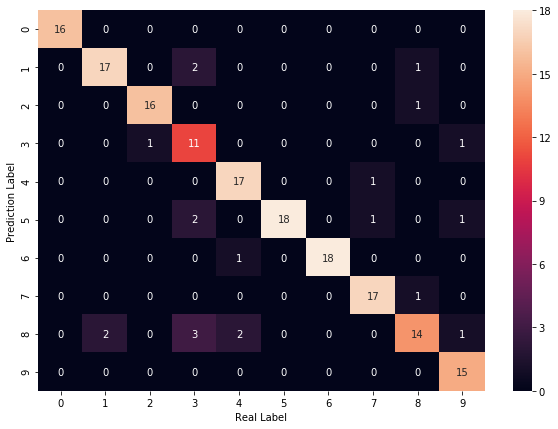

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9579468150896723

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9900641444195905

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1020 Total connections::1358
